In [22]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
with open('../../spbu-ai-fundamentals/config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

В этой теме мы поработаем с данными, посвященными определению рака молочной железы на основе различных признаков анализа клеток в биопсии (радиус, кривизна, симметрия). Известно, что этот датасет линейно разделим.

In [24]:
cfg = {
    'classification': {
        'wdbc': 'wdbc.tar/data.csv'  
    }
}
df = pd.read_csv(cfg["classification"]["wdbc"])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Задание**: Проведите краткий EDA. Есть ли выбросы в данных, какие столбцы коррелируют больше всего, стоит ли преобразоывавть какие-то признаки? Хватит 3-4 графиков или таблиц (но можно больше).

In [26]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1}).astype(int)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_17016\2950225700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1}).astype(int)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Задание**: выведите, сколько в датасете примеров позитивного и негативного класса.

In [28]:
binary_columns = []
for column in df.columns:
    if df[column].nunique() == 2:
        binary_columns.append(column)

if binary_columns:
    print("\nНайдены бинарные столбцы:")
    for col in binary_columns:
        class_counts = df[col].value_counts()
        print(f"\nРаспределение в столбце '{col}':")
        print(class_counts)

        positive_class = class_counts.idxmin()
        negative_class = class_counts.idxmax()
        
        print(f"\nРезультат для столбца '{col}':")
        print(f"Негативный класс ({negative_class}): {class_counts[negative_class]} примеров")
        print(f"Позитивный класс ({positive_class}): {class_counts[positive_class]} примеров")
else:
    print("\nБинарные столбцы не найдены. Пожалуйста, укажите целевую переменную.")


Найдены бинарные столбцы:

Распределение в столбце 'diagnosis':
diagnosis
0    357
1    212
Name: count, dtype: int64

Результат для столбца 'diagnosis':
Негативный класс (0): 357 примеров
Позитивный класс (1): 212 примеров


In [29]:
target = 'diagnosis'
features = list(df.columns)
features.remove('diagnosis')
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [31]:
X = df[features]
y = df[[target]]

Попробуем обучить логистическую регрессию на этих данных. Обратите внимание, что по умолчанию применяется L2 регуляризация,мы будем строить предсказания без нее. Однако, в качестве упражнения, сравним результаты с масштабированием признаков и без.

**Задание**: оцените, насколько сбалансированы признаки по масштабу. Попробуйте ответить до запуска кода, стоит ли их сначала масштабировать и почему. 

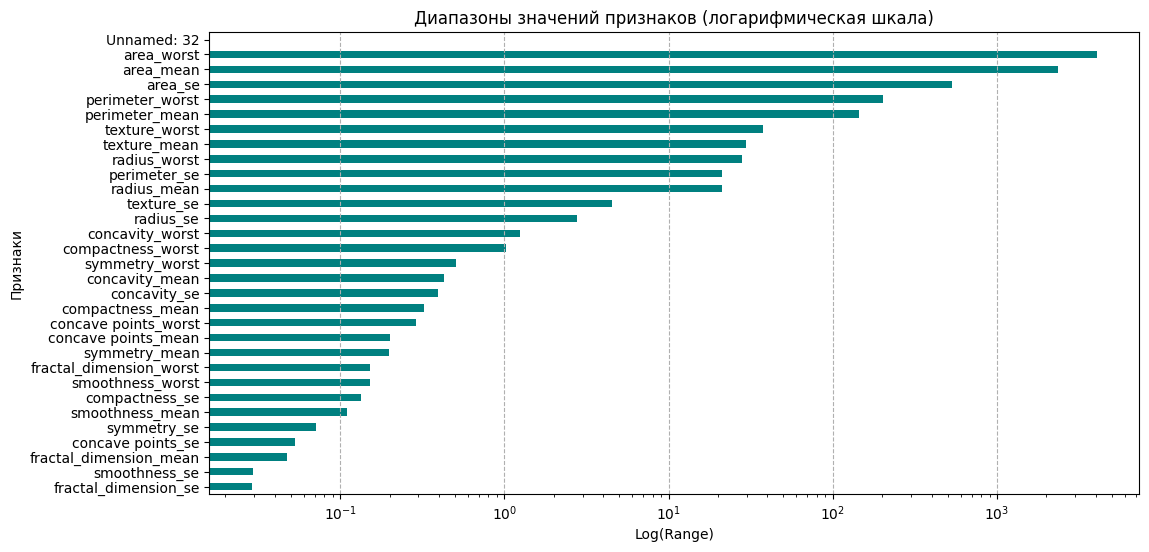

Статистика диапазонов:
count      30.000000
mean      248.581428
std       843.045942
min         0.028945
25%         0.151688
50%         0.467050
75%        26.388250
max      4068.800000
Name: range, dtype: float64


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('wdbc.tar/data.csv')

# Выбор только числовых признаков (исключая id)
numeric_features = df.select_dtypes(include=['float64']).columns

# Анализ диапазонов значений
stats = df[numeric_features].agg(['min', 'max', 'mean', 'std']).T
stats['range'] = stats['max'] - stats['min']
stats['cv'] = stats['std'] / stats['mean']  # Коэффициент вариации

# Визуализация диапазонов
plt.figure(figsize=(12, 6))
stats['range'].sort_values().plot(kind='barh', logx=True, color='teal')
plt.title('Диапазоны значений признаков (логарифмическая шкала)')
plt.xlabel('Log(Range)')
plt.ylabel('Признаки')
plt.grid(axis='x', linestyle='--')
plt.show()

print("Статистика диапазонов:")
print(stats['range'].describe())

Обязательно нужно масштабировать, потому что:
  Алгоритмы на расстояниях (k-NN, SVM, K-Means) будут доминироваться признаками с большими значениями (площадь, периметр);
  Градиентные методы (логистическая регрессия, нейронные сети) требуют одинакового масштаба для корректной работы оптимизатора;
  Регуляризация будет несправедливо наказывать признаки с меньшими значениям

Без масштабирования:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
clf = LogisticRegression(penalty=None)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9298245614035088

С масштабированием:

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
clf = LogisticRegression(penalty=None)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9649122807017544

Все классификаторы в Sklearn имеют два режима - предсказание лейблов и вероятностей. Предсказание вероятностей дает нам необработанные оценки принадлежности к тому или иному классу. Модель в таком случае возвращает вектор (для каждого семпла) размера N (где N - число классов). 

**Вопрос**: Какого размера будет предсказание в случае бинарной логистической регрессии? А многоклассовой? Другими словами, в каких случаях негативный класс добавляется как отдельный?

In [38]:
df_results = pd.DataFrame({
    'pred': clf.predict(X_test).reshape(-1),
    'pred_proba': clf.predict_proba(X_test)[:, 1],
    'true': y_test.reshape(-1),
})

**Задание**: Постройте матрицу предсказаний 100x2 для регрессии с двумя классами, где в каждой строке будут случайные значения. 
1) Получите из этого оценку принадлежности к классу с помощью сигмоиды и софтмакса. 
2) Постройте предсказание класса. В случае сигмоиды предсказывайте принадлежность к классу на основе границы, софтмакса - по максимальной вероятности

**Вопрос***: как еще можно предсказать класс? Всегда ли нужно брать именно эти функции?

In [39]:
np.random.seed(42)
random_scores = np.random.randn(100, 2)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid_probs = sigmoid(random_scores[:, 1])
sigmoid_preds = (sigmoid_probs >= 0.5).astype(int)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

softmax_probs = softmax(random_scores)
softmax_preds = np.argmax(softmax_probs, axis=1)

df_random = pd.DataFrame({
    'sigmoid_prob': sigmoid_probs,
    'sigmoid_pred': sigmoid_preds,
    'softmax_prob_class1': softmax_probs[:, 1],
    'softmax_pred': softmax_preds
})
print(df_random.head())

   sigmoid_prob  sigmoid_pred  softmax_prob_class1  softmax_pred
0      0.465489             0             0.346383             0
1      0.820984             1             0.705856             1
2      0.441732             0             0.500004             1
3      0.682966             1             0.307512             0
4      0.632408             1             0.733418             1


In [40]:
df_results.head(20)

,pred,pred_proba,true
0,1,1.000000e+00,1
1,0,0.000000e+00,0
2,0,0.000000e+00,0
3,0,4.282634e-238,0
4,0,2.399590e-153,0
5,1,1.000000e+00,1
6,0,0.000000e+00,0
7,1,1.000000e+00,1
8,1,1.000000e+00,1
9,1,1.000000e+00,1


# Метрики классификации


## Метрики на основе лейблов
Рассмотрим, какие у нас могут быть тезультаты классификации.

* TP (true positive) - правильно предсказали: рак есть, что модель и предсказала
* FP (false positive) - неправильно предсказали: рака нет,  а модель предсказала, что есть (1st order error)
* FN (false negative) - неправильно предсказали: рак вообще-то есть,  а модель предсказала, что нет (2nd order error)!
* TN (true negative) - правильно предсказали: рака нет, что модель и предсказала


Pos/Neg - общее количество объектов класса 1/0

Метрики:

* $ \text{Accuracy} = \frac{TP + TN}{Pos+Neg}$ - Доля правильных ответов
* $ \text{Error rate} = 1 -\text{accuracy}$ - Доля ошибок
* $ \text{Precision} =\frac{TP}{TP + FP}$ - Точность
* $ \text{Recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$ - Полнота
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$ F-мера (часто используют F1-меру, где $\beta=1$)

### ROC кривая

ROC кривая измеряет насколько хорошо классификатор разделяет два класса. Она построена на предсказании вероятности. Площадь под ней (ROC-AUC) является неплохой оценкой общего качества предсказаний. 
 
Пусть $y_{\rm i}$ - истинная метрка и $\hat{y}_{\rm i}$ - прогноз вероятности для $i^{\rm th}$ объекта.

Число положительных и отрицательных объектов: $\mathcal{I}_{\rm 1} = \{i: y_{\rm i}=1\}$ and $\mathcal{I}_{\rm 0} = \{i: y_{\rm i}=0\}$.

Для каждого порогового значения вероятности $\tau$ считаем True Positive Rate (TPR) и False Positive Rate (FPR):

\begin{equation}
TPR(\tau) = \frac{1}{I_{\rm 1}} \sum_{i \in \mathcal{I}_{\rm 1}} I[\hat{y}_{\rm i} \ge \tau] = \frac{TP(\tau)}{TP(\tau) + FN(\tau)} = \frac{TP(\tau)}{Pos}
\end{equation}

\begin{equation}
FPR(\tau) = \frac{1}{I_{\rm 0}} \sum_{i \in \mathcal{I}_{\rm 0}} I[\hat{y}_{\rm i} \ge \tau]= \frac{FP(\tau)}{FP(\tau) + TN(\tau)} = \frac{FP(\tau)}{Neg}
\end{equation}

In [41]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Используем для сравнения случайный предикт. Иногда это не худшая стратегия. Если в данных мало сигнала, случайное предсказание может работать лучше ложного.

In [48]:
from sklearn.dummy import DummyClassifier
random_classifier = DummyClassifier(strategy='uniform', random_state=42).fit(X_train, y_train)
y_random = random_classifier.predict_proba(X_test)[:,1]
y_random

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [49]:
random_preds = random_classifier.predict(X_test)
random_preds

array([0, 1, 0, ..., 0, 1, 1])

Random Classifier metrics
AUC-PR: 0.5057
AUC-ROC: 0.5000


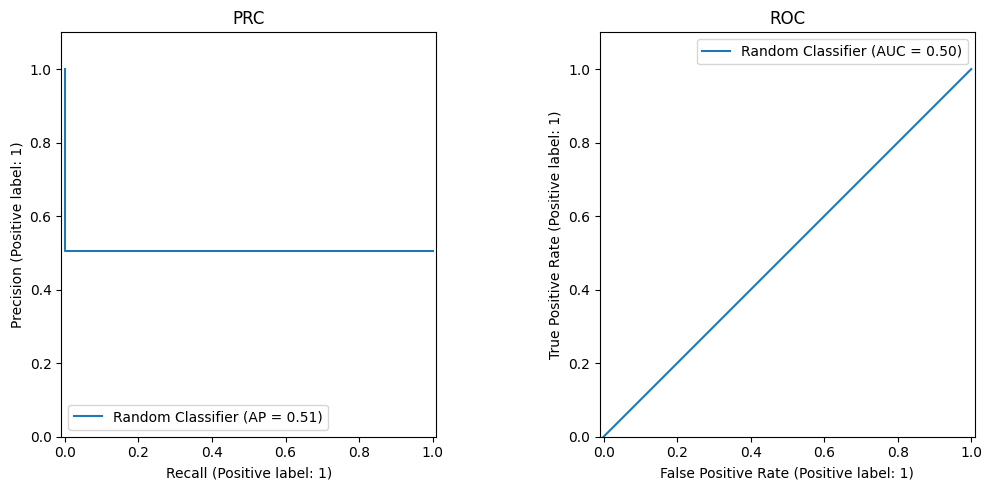

In [50]:
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

def depict_pr_roc(y_true, y_pred, classifier_name='Some Classifier', ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(11, 5))

    print(classifier_name, 'metrics')
    PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax[0], name=classifier_name)
    print('AUC-PR: %.4f' % average_precision_score(y_true, y_pred))
    ax[0].set_title("PRC")
    ax[0].set_ylim(0, 1.1)

    RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax[1], name=classifier_name)
    print('AUC-ROC: %.4f' % roc_auc_score(y_true, y_pred))
    ax[1].set_title("ROC")
    ax[1].set_ylim(0, 1.1)

    plt.tight_layout()
    plt.legend()


depict_pr_roc(y_test, y_random, 'Random Classifier')

Также посчитаем другие метрики на основе лейблов.

**Задание:** Дополните код по рассчету метрик.

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_metrics_report(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tn = np.sum((y_true == 0) & (y_pred == 0))

    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return [tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1]

In [52]:
# dataframe для сравнения
# методов классификации по метрикам
df_metrics = pd.DataFrame(
    columns=['acc', 'er', 'precision', 'recall', 'f1', 'auc_pr', 'roc_auc_score', 'reg_const']
)
precision, recall, _ = precision_recall_curve(y_test, y_random)
# добавление очередной строки с характеристиками метода
[tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1] = quality_metrics_report(y_test, random_preds)
df_metrics.loc['Random Classifier'] = [
      accuracy, error_rate, precision, recall, f1,
      average_precision_score(y_test, y_random),
      roc_auc_score(y_test, y_random),
      0,
]

# по аналогии результаты следующих экспериментов можно будет собрать в табличку
df_metrics

,acc,er,precision,recall,f1,auc_pr,roc_auc_score,reg_const
Random Classifier,0.518,0.482,0.523938,0.512195,0.518,0.505667,0.5,0.0


In [53]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7713333333333333

In [56]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_lr_prob = lr.predict_proba(X_test)[:, 1] 
y_lr_pred = lr.predict(X_test) 

[tp, fp, fn, tn, accuracy, error_rate, precision_val, recall_val, f1_val] = quality_metrics_report(y_test, y_lr_pred)

df_metrics.loc['Logistic Regression'] = [
    accuracy,
    error_rate,
    precision_val,
    recall_val,
    f1_val,
    average_precision_score(y_test, y_lr_prob),
    roc_auc_score(y_test, y_lr_prob),
    0
]

df_metrics

,acc,er,precision,recall,f1,auc_pr,roc_auc_score,reg_const
Random Classifier,0.518000,0.482000,0.523938,0.512195,0.518000,0.505667,0.500000,0.0
Logistic Regression,0.771333,0.228667,0.775713,0.770600,0.773148,0.829386,0.847872,0.0


Согласуются ли метрики? В чем может быть проблема accuracy?

**Задание**: Соберите табличку для разных классификаторов.

**Задание**: Постройте график PR-curve, ROC-curve для лучшего из них

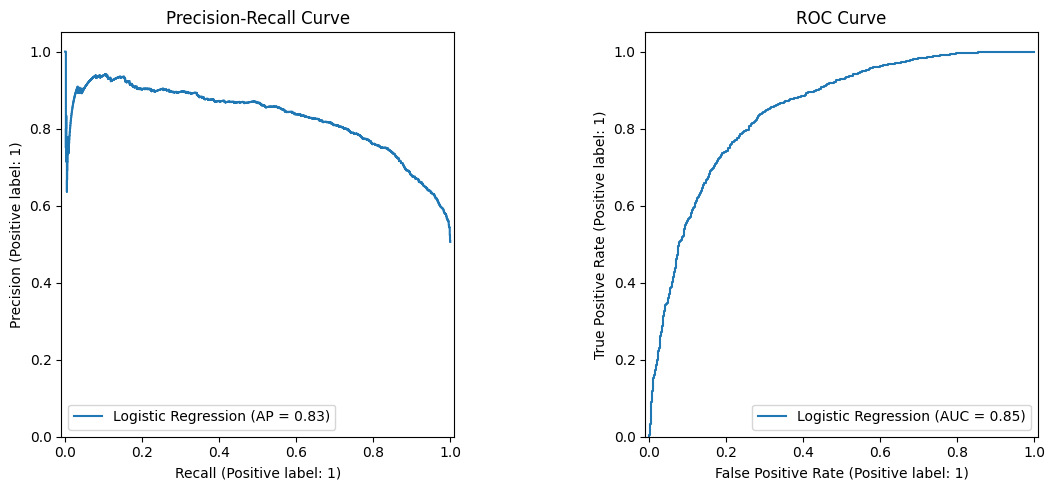

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# PR-кривая
PrecisionRecallDisplay.from_predictions(y_test, y_lr_prob, ax=ax[0], name='Logistic Regression')
ax[0].set_title("Precision-Recall Curve")
ax[0].set_ylim(0, 1.05)

# ROC-кривая
RocCurveDisplay.from_predictions(y_test, y_lr_prob, ax=ax[1], name='Logistic Regression')
ax[1].set_title("ROC Curve")
ax[1].set_ylim(0, 1.05)

plt.tight_layout()

**Задание:** Постройте таблицу точности для набора данных wbdc. Сделайте по таблице метрик на обучающей и тестовой выборках. В таблице сравните разные преобразования признаков и гиперпараметры (регуляризацию). Можно сделать три-четыре эксперимента. 
- На каком эксперименте получилось достичь лучшего качества на трейне?
- А на тесте?
- Переобучается ли модель?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

df = pd.read_csv('wdbc.tar/data.csv')

print("Пропущенные значения до обработки:")
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("\nПропущенные значения после обработки:")
print(df.isnull().sum())

X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Преобразуем в числовой формат

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

experiments = [
    {"name": "No Scaling, C=1.0", "scaler": None, "C": 1.0},
    {"name": "StandardScaler, C=1.0", "scaler": StandardScaler(), "C": 1.0},
    {"name": "StandardScaler, C=0.01", "scaler": StandardScaler(), "C": 0.01},
    {"name": "MinMaxScaler, C=1.0", "scaler": MinMaxScaler(), "C": 1.0},
]
results = []

for exp in experiments:
    steps = []

    steps.append(("imputer", SimpleImputer(strategy='median')))
    
    if exp["scaler"]:
        steps.append(("scaler", exp["scaler"]))
    
    steps.append(("clf", LogisticRegression(
        C=exp["C"], 
        max_iter=10000, 
        random_state=42,
        solver='lbfgs'
    )))
    
    pipe = Pipeline(steps)
    pipe.fit(X_train, y_train)
    
    for X_data, y_data, split_name in [
        (X_train, y_train, "train"),
        (X_test, y_test, "test")
    ]:
        y_pred = pipe.predict(X_data)
        y_prob = pipe.predict_proba(X_data)[:, 1]
        
        results.append({
            "experiment": exp["name"],
            "split": split_name,
            "accuracy": accuracy_score(y_data, y_pred),
            "f1": f1_score(y_data, y_pred, pos_label=1),
            "roc_auc": roc_auc_score(y_data, y_prob)
        })

results_df = pd.DataFrame(results)
pivot_results = results_df.pivot(
    index="experiment", 
    columns="split", 
    values=["accuracy", "f1", "roc_auc"]
)

print("\nРезультаты экспериментов:")
display(pivot_results)

pivot_results['overfitting_gap'] = pivot_results[('accuracy', 'train')] - pivot_results[('accuracy', 'test')]
print("\nВеличина переобучения (разница accuracy train-test):")
display(pivot_results['overfitting_gap'])

Пропущенные значения до обработки:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
frac

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(



Результаты экспериментов:


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32'

accuracy                  f1             roc_auc  \
split                       test     train      test     train      test   
experiment                                                                 
MinMaxScaler, C=1.0     0.973684  0.969231  0.962963  0.957317  0.998016   
No Scaling, C=1.0       0.938596  0.964835  0.911392  0.952381  0.992394   
StandardScaler, C=0.01  0.947368  0.953846  0.923077  0.934169  0.997685   
StandardScaler, C=1.0   0.964912  0.986813  0.951220  0.982036  0.996032   

                                  
split                      train  
experiment                        
MinMaxScaler, C=1.0     0.992962  
No Scaling, C=1.0       0.994696  
StandardScaler, C=0.01  0.993065  
StandardScaler, C=1.0   0.997585


Величина переобучения (разница accuracy train-test):


experiment
MinMaxScaler, C=1.0      -0.004453
No Scaling, C=1.0         0.026239
StandardScaler, C=0.01    0.006478
StandardScaler, C=1.0     0.021901
Name: overfitting_gap, dtype: float64

StandardScaler, C=1.0 и MinMaxScaler, C=1.0 показали наивысшее качество на обучающей выборке (~99% accuracy)

Без регуляризации и с масштабированием модель максимально подстроилась под тренировочные данные

Заключение: Масштабирование признаков обязательно, а умеренная регуляризация (C=0.01) позволяет достичь оптимального баланса между качеством и переобучением.